In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt

In [212]:
from sklearn.metrics import classification_report


GRAFICO DE LOSS Y ACCURACY

In [190]:
def plot_loss_tf(history):
    epochs = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(10, 4))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], 'r-', label='Training Loss')
    plt.title('Loss for epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], 'b-', label='Training Accuracy')
    plt.title('Accuracy for epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


In [191]:
training_set = pd.read_csv("../../data/training_set.csv")
test_set = pd.read_csv("../../data/test_set.csv")


In [ ]:
# Cuantos valores NaN hay
training_set.isna().sum().sum()

In [ ]:
# Cuales filas tienen NaN
training_set[training_set.isna().any(axis=1)]


In [192]:
# Eliminar filas con valores NaN
training_set.dropna(inplace=True)

In [193]:
# Asignar las columnas de características (serie temporal)
X_train = training_set.iloc[:, 1:51]
X_test = test_set.iloc[:, 1:51]
# Asignar la columna objetivo (última columna)
Y_train = training_set.iloc[:, -1]
Y_test = test_set.iloc[:, -1]


IMPORTANTE: Hay que sumar a la columna de prediccion porque -1 no funciona en funcion de LOSS

In [ ]:
Y_train = Y_train + 1
Y_test = Y_test + 1


In [ ]:
print(np.unique(Y_train))  # debería dar array([0, 1, 2])
print(np.unique(Y_test))


In [209]:
X_train.info()
Y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 686 entries, 10 to 700
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   open_d-4                     686 non-null    float64
 1   MA_d-4                       686 non-null    float64
 2   RSI_d-4                      686 non-null    float64
 3   MACD_d-4                     686 non-null    float64
 4   trend_d-4                    686 non-null    float64
 5   issue_news_d-4               686 non-null    float64
 6   negative_sentiment_news_d-4  686 non-null    float64
 7   neutral_sentiment_news_d-4   686 non-null    float64
 8   positive_sentiment_news_d-4  686 non-null    float64
 9   average_news_d-4             686 non-null    float64
 10  open_d-3                     686 non-null    float64
 11  MA_d-3                       686 non-null    float64
 12  RSI_d-3                      686 non-null    float64
 13  MACD_d-3                

Determinacion de la red neuronal

In [198]:
tf.random.set_seed(1234) 
model = Sequential(
    [               
        tf.keras.Input(shape=(50,)),
        Dense(30,activation='relu',name='L1'),
        Dense(20,activation='relu',name='L2'),
        Dense(10,activation='relu',name='L3'),
        Dense(3,activation='linear',name='L4')
        
    ], name = "softmax" 
)

In [ ]:
model.summary()

Compilacion y entrenamiento de la red

In [199]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Anterior valor 0.001
    metrics=['accuracy']
)

history = model.fit(
    X_train,Y_train,
    epochs=40
)

Epoch 1/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.3776 - loss: 1983.9395
Epoch 2/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5044 - loss: 269.2795
Epoch 3/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6079 - loss: 95.6501 
Epoch 4/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6458 - loss: 49.6557
Epoch 5/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6050 - loss: 50.6202
Epoch 6/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6181 - loss: 54.7678
Epoch 7/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6224 - loss: 52.7795
Epoch 8/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6079 - loss: 64.2586
Epoch 9/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6297 - loss: 55.7976
Epoch 10/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6429 - loss: 51.6777
Epoch 11/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6443 - loss: 48.3854
Epoch 12/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accur

Grafica de loss y accuracy por epoch

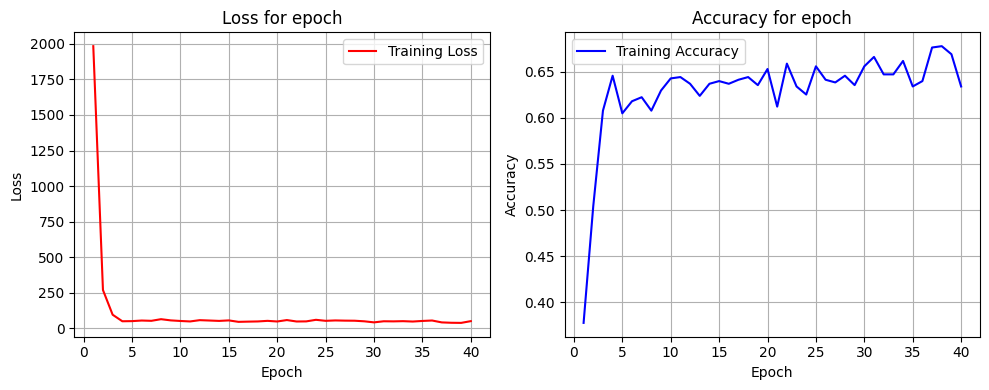

In [200]:
plot_loss_tf(history)

Evaluacion de Loss y Accuracy en la data_test

In [206]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Accuracy en test: {accuracy:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8182 - loss: 50.8250
Accuracy en test: 0.8182


Visualizar clases: -1 0 1, que ahora es 0 1 2

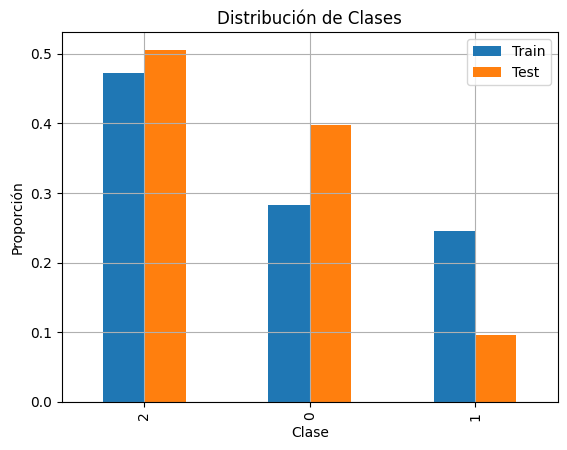

In [210]:
# Convertimos a DataFrame para facilitar la visualización
train_distribution = pd.Series(Y_train).value_counts(normalize=True)
test_distribution = pd.Series(Y_test).value_counts(normalize=True)

# Comparar visualmente
df = pd.DataFrame({
    'Train': train_distribution,
    'Test': test_distribution
}).fillna(0)

df.plot(kind='bar', title='Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Proporción')
plt.grid(True)
plt.show()


In [236]:
Y_test.head(20)

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    1
14    0
15    0
16    0
17    0
18    0
19    0
Name: target_trend, dtype: int64

In [237]:
Y_pred

array([2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0])

Prediccion de X_test 

In [231]:
Y_pred = model.predict(X_test)
Y_pred = tf.nn.softmax(Y_pred).numpy()
Y_pred = np.argmax(Y_pred, axis=1)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


Valores Precision recall f1-score

In [234]:
# Reporte completo: precisión, recall y F1 por clase
print(classification_report(Y_test, Y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.7471    0.9286    0.8280        70
           1     0.0000    0.0000    0.0000        17
           2     0.9080    0.8876    0.8977        89

    accuracy                         0.8182       176
   macro avg     0.5517    0.6054    0.5753       176
weighted avg     0.7563    0.8182    0.7833       176

